## 作業
在鐵達尼資料集中，
透過進階補值方法 KNN，將鐵達尼號中的 Titanic_train
.csv 中的 age 的遺失值進行補值。    
* step1: 觀察 Age 和 Pclass 與 Sex 是否有關連性?
* step2: 如果有關連性，運用 KNN ，取出 Age 、 Pclass、 Sex的資料，以 Sex 與 Pclass 補 Age 遺失值。 

In [73]:
# import library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import math
import statistics
import seaborn as sns
from IPython.display import display

## 讀入資料

In [74]:
df_data=pd.read_csv('Titanic_train.csv')

## 觀察 Age

        Avg. of age
Pclass             
1         38.233441
2         29.877630
3         25.140620
-> Age和Pclass是有關係的，可以發現pclass=3的平均年齡相較於pclass=1較年輕


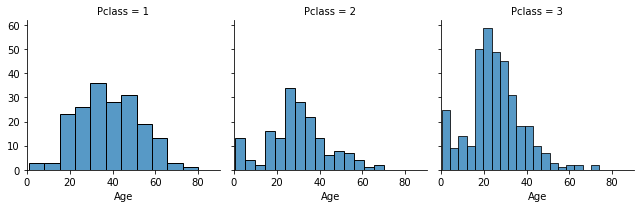

In [75]:
# sns.regplot(x='Age',y='Pclass',color='g',data=df_data)

# plt.figure()
g=sns.FacetGrid(df_data,col='Pclass')
g.map(sns.histplot,'Age')
g.set(xlim=(0, 90))

avg_age_pclass=df_data.groupby(['Pclass']).mean().loc[:,['Age']]
avg_age_pclass.columns=['Avg. of age']
print(avg_age_pclass)
print('-> Age和Pclass是有關係的，可以發現pclass=3的平均年齡相較於pclass=1較年輕')

        Avg. of age
Sex                
female    27.915709
male      30.726645
-> Age和Sex可能有關聯，但不像是Pclass這麼明顯


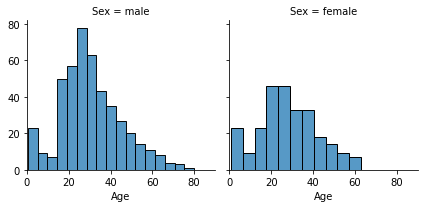

In [76]:
g=sns.FacetGrid(df_data,col='Sex')
g.map(sns.histplot,'Age')
g.set(xlim=(0, 90))

avg_age_Sex=df_data.groupby(['Sex']).mean().loc[:,['Age']]
avg_age_Sex.columns=['Avg. of age']
print(avg_age_Sex)
print('-> Age和Sex可能有關聯，但不像是Pclass這麼明顯')

# 以Pclass對Age進行補值

In [77]:
from sklearn import preprocessing
data=df_data.loc[:,['Pclass','Age','Sex']].copy()
#下面兩行程式，讓 Male=1, FeMale-0.
le = preprocessing.LabelEncoder()
data['Sex']=le.fit_transform(data['Sex'])
display(data)

,Pclass,Age,Sex
0,3,22.0,1
1,1,38.0,0
2,3,26.0,0
3,1,35.0,0
4,3,35.0,1
...,...,...,...
886,2,27.0,1
887,1,19.0,0
888,3,NaN,0
889,1,26.0,1


In [78]:
from sklearn.metrics.pairwise import nan_euclidean_distances
display(pd.DataFrame(nan_euclidean_distances(data)))

,0,1,2,3,4,5,6,7,8,9,...,881,882,883,884,885,886,887,888,889,890
0,0.000000,16.155494,4.123106,13.190906,13.000000,0.000000,32.062439,20.000000,5.099020,8.124038,...,11.000000,1.000000,6.082763,3.000000,17.029386,5.099020,3.741657,1.224745,4.472136,10.000000
1,16.155494,0.000000,12.165525,3.000000,3.741657,2.738613,16.031220,36.069378,11.180340,24.020824,...,5.477226,16.124515,10.099505,13.190906,2.236068,11.090537,19.000000,2.449490,12.041595,6.403124
2,4.123106,12.165525,0.000000,9.219544,9.055385,1.224745,28.089144,24.020824,1.000000,12.041595,...,7.071068,4.000000,2.449490,1.414214,13.000000,1.732051,7.280110,0.000000,2.236068,6.082763
3,13.190906,3.000000,9.219544,0.000000,2.236068,2.738613,19.026298,33.075671,8.246211,21.023796,...,3.000000,13.152946,7.141428,10.246951,4.472136,8.124038,16.000000,2.449490,9.055385,3.741657
4,13.000000,3.741657,9.055385,2.236068,0.000000,0.000000,19.104973,33.000000,8.062258,21.047565,...,2.000000,13.038405,7.071068,10.000000,4.123106,8.062258,16.155494,1.224745,9.219544,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,5.099020,11.090537,1.732051,8.124038,8.062258,1.224745,27.018512,25.019992,1.414214,13.038405,...,6.082763,5.196152,1.000000,2.236068,12.083046,0.000000,8.124038,1.732051,1.414214,5.099020
887,3.741657,19.000000,7.280110,16.000000,16.155494,2.738613,35.014283,17.146428,8.246211,5.099020,...,14.177447,3.605551,9.110434,6.403124,20.099751,8.124038,0.000000,2.449490,7.071068,13.190906
888,1.224745,2.449490,0.000000,2.449490,1.224745,1.224745,2.738613,1.224745,0.000000,1.224745,...,1.224745,0.000000,1.732051,1.224745,0.000000,1.732051,2.449490,0.000000,2.738613,1.224745
889,4.472136,12.041595,2.236068,9.055385,9.219544,2.449490,28.000000,24.083189,2.449490,12.083046,...,7.280110,4.582576,2.236068,2.236068,13.190906,1.414214,7.071068,2.738613,0.000000,6.324555


In [79]:
value_neighbors=1
from sklearn.impute import KNNImputer
#初始化: Initialize KNNImputer
imputer = KNNImputer(n_neighbors=value_neighbors)
df_filled = pd.DataFrame(imputer.fit_transform(data))
df_filled.columns=['Pclass','Age','Sex']
display(df_filled)
# print(df_filled)

,Pclass,Age,Sex
0,3.0,22.0,1.0
1,1.0,38.0,0.0
2,3.0,26.0,0.0
3,1.0,35.0,0.0
4,3.0,35.0,1.0
...,...,...,...
886,2.0,27.0,1.0
887,1.0,19.0,0.0
888,3.0,26.0,0.0
889,1.0,26.0,1.0
